In [1]:
import logging
import sys


date_strftime_format = "%Y-%m-%y %H:%M:%S"
logging.basicConfig(stream=sys.stdout, level=logging.INFO, format="%(asctime)s %(message)s", datefmt=date_strftime_format)

# Data

### Training data
- Source: http://mattmahoney.net/dc/text8.zip
- Stored in: `data/train.txt`

### Analogies data
- Source: https://raw.githubusercontent.com/nicholas-leonard/word2vec/refs/heads/master/questions-words.txt
- Stored in: `data/analogies.txt`

# Defining model

In [2]:
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
from gensim.models.word2vec import Text8Corpus


class EpochLogger(CallbackAny2Vec):
    def __init__(self):
        self.epoch = 0
        self.last_logged_loss = 0
        self.loss_curve = []

    def on_epoch_begin(self, model):
        print(f"Epoch #{self.epoch} start")

    def on_epoch_end(self, model):
        curr_loss = model.get_latest_training_loss() - self.last_logged_loss
        self.last_logged_loss = model.get_latest_training_loss()

        self.loss_curve.append(curr_loss)

        print(
            f"Epoch #{self.epoch} end.\nTraining loss: {curr_loss}"
        )
        self.epoch += 1


epoch_logger = EpochLogger()

word_embedder = Word2Vec(
    sentences=Text8Corpus(fname="../data/train.txt"),
    sg=0,
    window=9,
    vector_size=100,
    epochs=10,
    compute_loss=True,
    callbacks=[epoch_logger],
    min_count=0,
    workers=8,
)


2024-12-24 15:42:41 collecting all words and their counts
2024-12-24 15:42:41 PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2024-12-24 15:42:54 collected 253854 word types from a corpus of 17005207 raw words and 1701 sentences
2024-12-24 15:42:54 Creating a fresh vocabulary
2024-12-24 15:42:56 Word2Vec lifecycle event {'msg': 'effective_min_count=0 retains 253854 unique words (100.00% of original 253854, drops 0)', 'datetime': '2024-12-01T15:42:56.847189', 'gensim': '4.3.3', 'python': '3.10.14 (main, Apr 15 2024, 18:28:39) [Clang 17.0.6 ]', 'platform': 'Linux-5.15.153.1-microsoft-standard-WSL2-x86_64-with-glibc2.35', 'event': 'prepare_vocab'}
2024-12-24 15:42:56 Word2Vec lifecycle event {'msg': 'effective_min_count=0 leaves 17005207 word corpus (100.00% of original 17005207, drops 0)', 'datetime': '2024-12-01T15:42:56.848388', 'gensim': '4.3.3', 'python': '3.10.14 (main, Apr 15 2024, 18:28:39) [Clang 17.0.6 ]', 'platform': 'Linux-5.15.153.1-microsoft-standard-WSL2-x

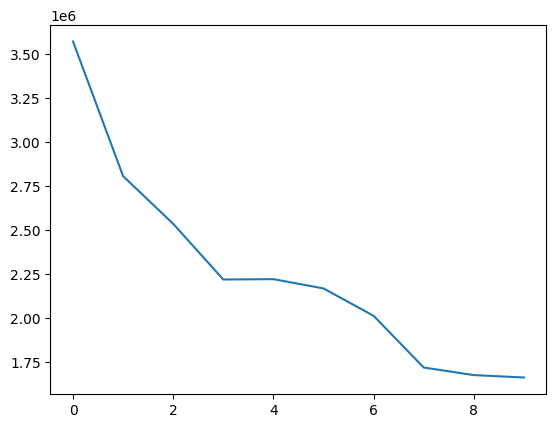

In [3]:
import matplotlib.pyplot as plt

plt.plot(epoch_logger.loss_curve)
plt.show()

In [6]:
score, sections = word_embedder.wv.evaluate_word_analogies("../data/analogies.txt")

2024-12-24 16:04:21 Evaluating word analogies for top 300000 words in the model on ../data/analogies.txt
2024-12-24 16:04:37 capital-common-countries: 55.5% (281/506)
2024-12-24 16:06:22 capital-world: 25.0% (1054/4216)
2024-12-24 16:06:44 currency: 5.7% (49/866)
2024-12-24 16:08:03 city-in-state: 15.5% (382/2467)
2024-12-24 16:08:20 family: 51.2% (259/506)
2024-12-24 16:08:52 gram1-adjective-to-adverb: 9.9% (98/992)
2024-12-24 16:09:16 gram2-opposite: 7.4% (60/812)
2024-12-24 16:09:51 gram3-comparative: 61.0% (813/1332)
2024-12-24 16:10:15 gram4-superlative: 24.5% (243/992)
2024-12-24 16:10:42 gram5-present-participle: 33.7% (356/1056)
2024-12-24 16:11:21 gram6-nationality-adjective: 59.3% (949/1599)
2024-12-24 16:12:07 gram7-past-tense: 26.2% (409/1560)
2024-12-24 16:12:49 gram8-plural: 40.3% (537/1332)
2024-12-24 16:13:12 gram9-plural-verbs: 28.4% (247/870)
2024-12-24 16:13:12 Quadruplets with out-of-vocabulary words: 2.2%
2024-12-24 16:13:12 NB: analogies containing OOV words were 

In [9]:
score

0.3002721658117869

## Searching best hyper-parameters configs

### Grid search routine

In [ ]:
from itertools import product

def run_grid_search(
    param_grid: dict,
    param_conditions_callback: callable = None,
    return_best: bool = False
):
    param_combinations = list(product(*param_grid.values()))

    param_keys = list(param_grid.keys())

    results = []
    for params in param_combinations:
        if not param_conditions_callback(param_grid):
            continue

        param_dict = dict(zip(param_keys, params))

        model = Word2Vec(

        )

        score = model.wv.evaluate_word_analogies("../data/analogies.txt")

        results.append((param_dict, score))
    
    if not return_best:
        return results

    return max(results, key=lambda x: x[1])